In [86]:
import sys
import matplotlib
matplotlib.use('Agg')

import pandas
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
df = pandas.read_csv("./hr_train_1_fixed.csv")

### DEL 3 - 1

In [148]:
pip install seaborn

     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
import pandas as pd
import matplotlib
matplotlib.use('TkAgg') 

import seaborn as sns

# Läs in data från din CSV-fil (anpassa sökvägen)
data = df

# Skapa ett stapeldiagram för fördelningen av 'ignore'-beslut efter kön
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', hue='ignore')
plt.title("Fördelning av 'ignore'-beslut efter kön")
plt.xlabel("Kön")
plt.ylabel("Antal")
plt.legend(title="'ignore'")
plt.savefig('gender.png')

plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['gender'], df['lang'], normalize='index'), annot=True, cmap="YlGnBu")
plt.title("Korsdiagram: 'ignore'-beslut efter kön och språk")
plt.xlabel("Språk")
plt.ylabel("Kön")
plt.savefig('lang.png')




### Del 3-3 
"Vi ser fram emot den första enkla insikten att tweets är mindre än 50% och att det är mindre sannolikt att 'true'-resultatet förekommer.

Gini-index visar nu att resultaten är mer olikartade mellan olika prov. Vi ser att majoriteten av resultaten ligger åt höger i diagrammet.

När vi använder DecisionTreeClassifier() ser vi att de som har språket 'java' har en större chans att vara sanna ('true'), vilket stämmer överens med graferna från databasen som visar att 'java' är det mest populära språket."

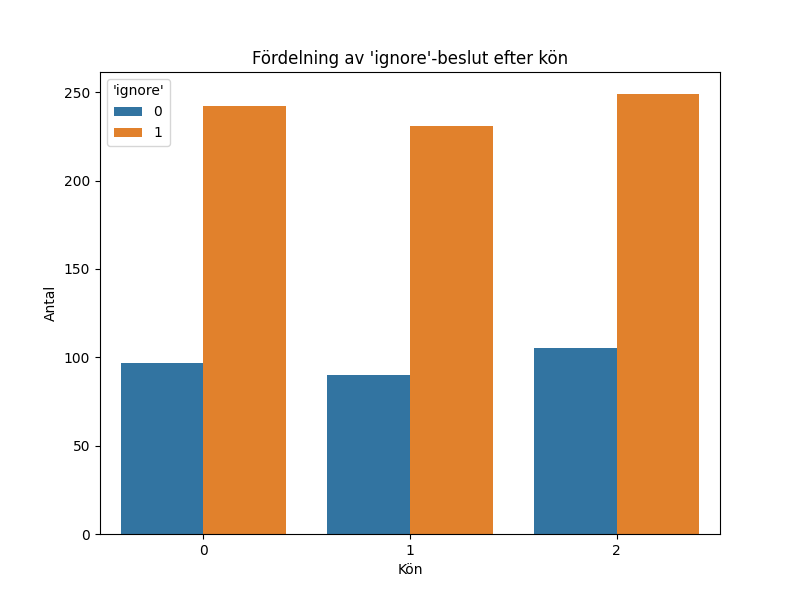

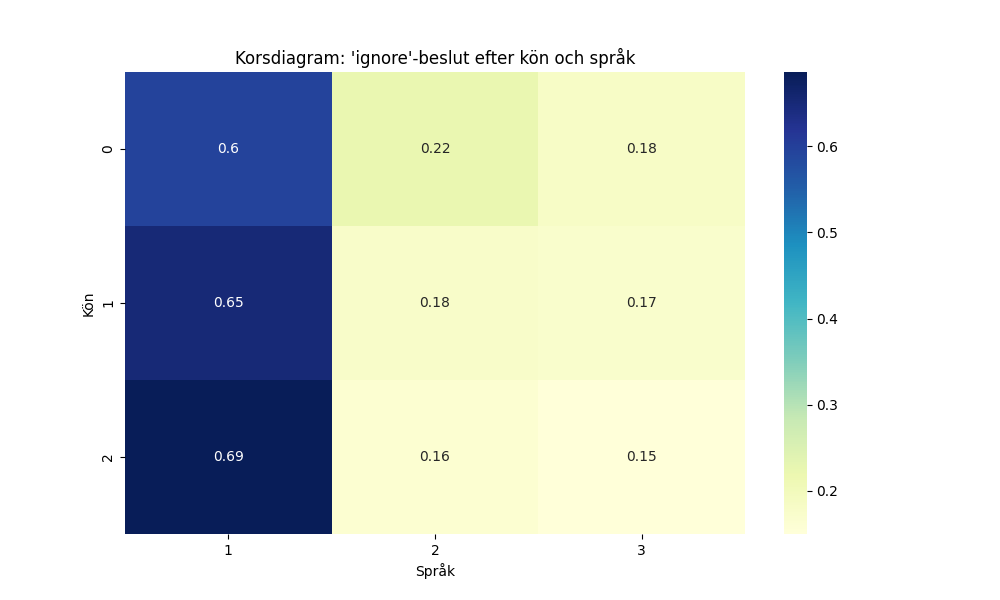

In [161]:
from IPython.display import Image, display
gender = './gender.png'
display(Image(filename=gender))

lang = './lang.png'
display(Image(filename=lang))

In [169]:
random_values = np.random.randint(0, 3, 1014)  # Generates random integers between 0 and 2 (inclusive)
df['gender'] = random_values
print(df.head(1))

   level  lang  tweets  phd  ignore  gender
0      3     1       0    0       1       2


In [142]:
# Code function to convert dataframe ignore from string (true or false ) to (0 or  1)
features = ['level', 'lang', 'tweets', 'phd','gender']

X = df[features]
y = df['ignore']

dtree = DecisionTreeClassifier()

dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)
total = tree.plot_tree(dtree, feature_names=features)


In [170]:
print(dtree.predict([[2, 1, 3, 1,2]]))
print(dtree.predict([[1, 1, 3, 1,1]]))
print(dtree.predict([[3, 1, 3, 1,2]]))
print("test som visar att den som har java språk har större sjens att vara true")

[1]
[1]
[1]


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(dtree, feature_names=features, filled=True, class_names=["0", "1"])
plt.savefig('decision_tree_gender.png')

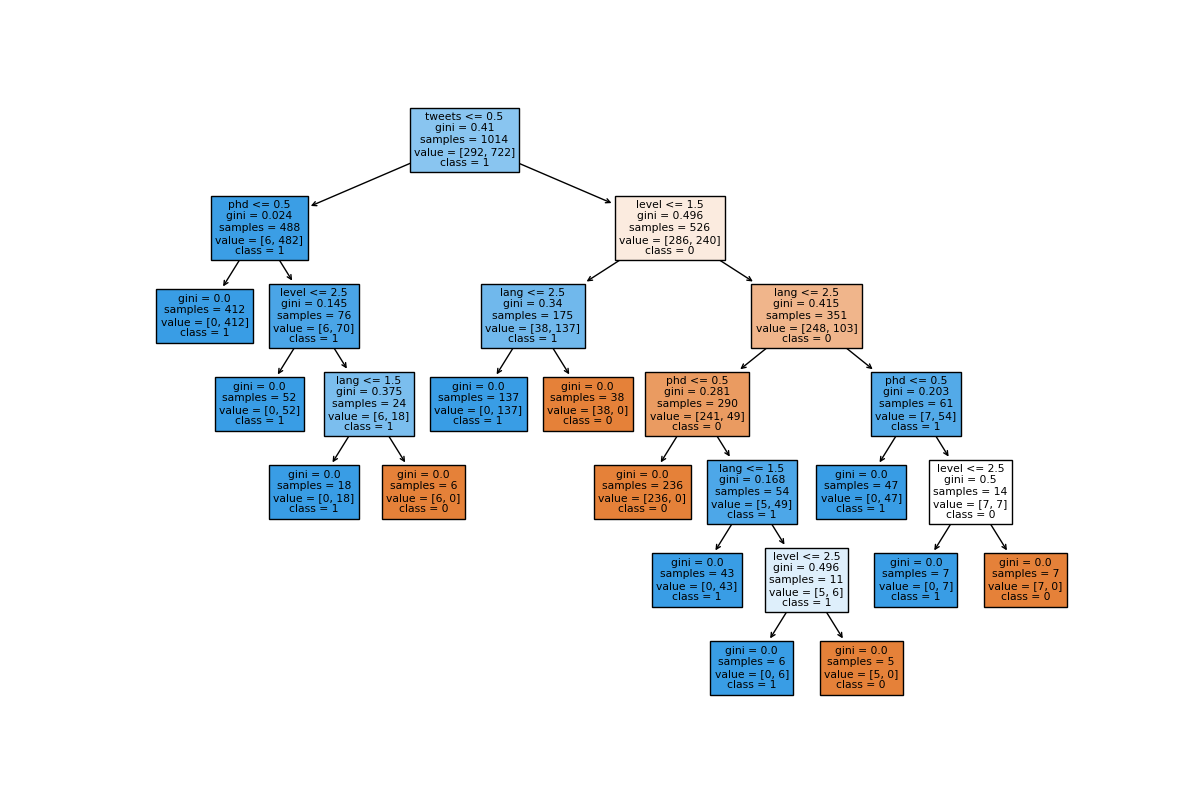

In [99]:
from IPython.display import Image, display
image_path = './decision_tree_gender.png'
display(Image(filename=image_path))

## DEL 3 - 2
Bevisa att två tredjedelar av kön(gender) 2 kommer bli flaggade med ‘ignore’:True i ditt test.

In [136]:
gender_2_subset = df[df['gender'] == 2]
ignore_true_count = (gender_2_subset['ignore'] == True).sum()

total_count = len(gender_2_subset)
ignore_true_fraction = ignore_true_count / total_count
expected_fraction = 2 / 3

if ignore_true_fraction == expected_fraction:
      print("The proportion 'ignore': True is two-thirds of the gender (gender) 2.")
else:
      print("Proportion 'ignore': True is not two thirds of gender 2.")

Proportion 'ignore': True is not two thirds of gender 2.


## DEL 3 - 3

"Vi ser fram emot den första enkla insikten att tweets är mindre än 50% och att det är mindre sannolikt att 'true'-resultatet förekommer.
Gini-index visar nu att resultaten är mer olikartade mellan olika prov. Vi ser att majoriteten av resultaten ligger åt höger i diagrammet.
När vi använder DecisionTreeClassifier() ser vi att de som har språket 'java' har en större chans att vara sanna ('true'), vilket stämmer överens med graferna från databasen som visar att 'java' är det mest populära språket."

### Tips: Prova dela upp din data i test/train (20%/80%)

In [135]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['ignore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
plt.figure(figsize=(12, 8))  # Ställ in figurens storlek
plot_tree(dtree, feature_names=features, filled=True, class_names=["0", "1"])
plt.savefig('decision_tree_gender20.png')

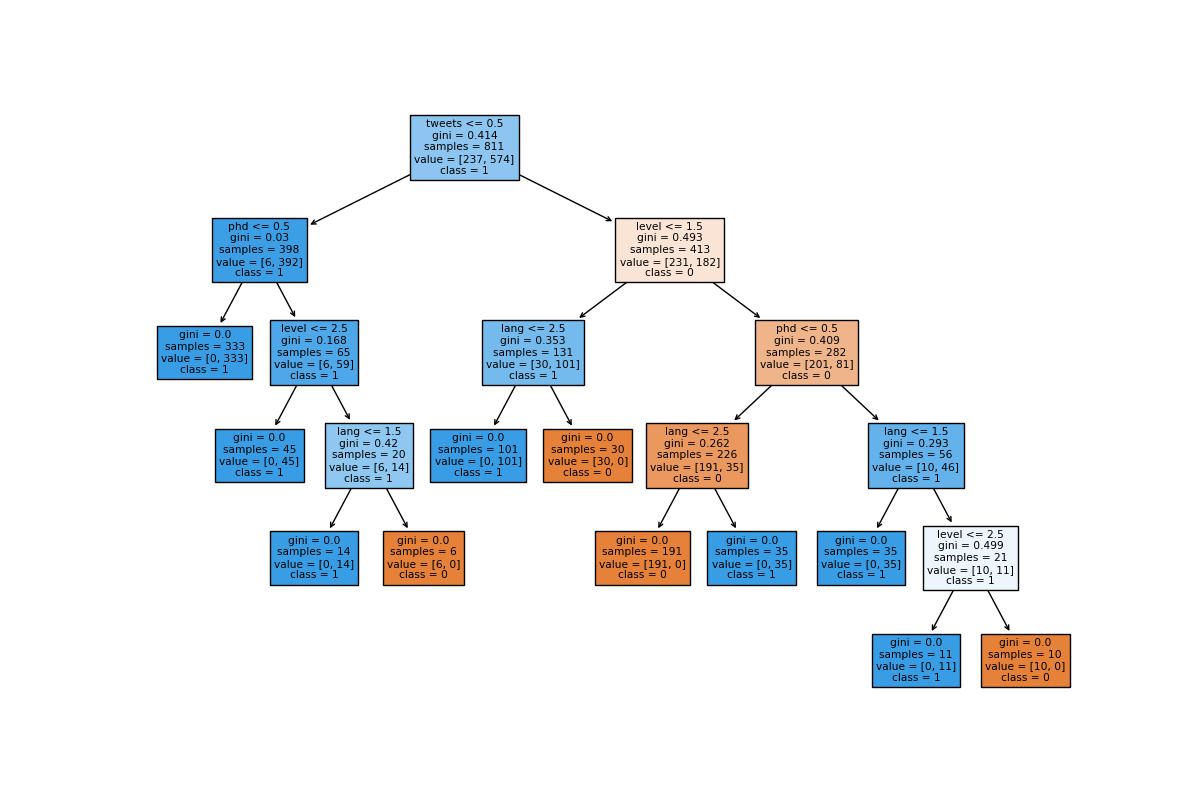

In [126]:
image_path = './decision_tree_gender20.png'
display(Image(filename=image_path))